In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
fake = pd.read_csv("C:/Users/avani/Downloads/Fake.csv")
true = pd.read_csv("C:/Users/avani/Downloads/True.csv")


In [3]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [11]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [12]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [6]:
# Check the data
data.head()

,title,text,subject,date,target
0,IS FOX ABOUT TO BECOME CNN? Leftist Wives Of L...,It is difficult to exaggerate the significance...,left-news,"Apr 20, 2017",fake
1,BREAKING: BLM RIOTERS Have Surrounded St. Loui...,Is karma knocking on her door?Mayor Lyda Krews...,left-news,"Sep 15, 2017",fake
2,Unprecedented not to hold Senate hearing on to...,WASHINGTON (Reuters) - Any decision not to hol...,politicsNews,"February 23, 2016",true
3,White House divisions on display with Scaramuc...,WASHINGTON (Reuters) - The rifts inside Presid...,politicsNews,"July 27, 2017",true
4,BREAKING: VIDEO OF YOUNG OBAMA EMERGES Discuss...,Who needs family when you have a neighborhood ...,left-news,"Apr 14, 2015",fake


In [13]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,OHIO SEC OF STATE Explains How He Will Prevent...,As much as many of us wish there were a legiti...,politics,fake
1,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,true
2,Plan to raise California minimum wage to $15 c...,"SACRAMENTO, Calif. (Reuters) - A plan to raise...",politicsNews,true
3,(VIDEO) KRAUTHAMMER: FORMER CIA DEPUTY DIRECTO...,,Government News,fake
4,BREAKING: C.I.A. Knew Russia Wanted Trump WAY...,We already knew that Russia wanted Donald Trum...,News,fake


In [14]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,As much as many of us wish there were a legiti...,politics,fake
1,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,true
2,"SACRAMENTO, Calif. (Reuters) - A plan to raise...",politicsNews,true
3,,Government News,fake
4,We already knew that Russia wanted Donald Trum...,News,fake


In [15]:

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,as much as many of us wish there were a legiti...,politics,fake
1,beijing (reuters) - u.s. president donald trum...,politicsNews,true
2,"sacramento, calif. (reuters) - a plan to raise...",politicsNews,true
3,,Government News,fake
4,we already knew that russia wanted donald trum...,News,fake


In [16]:

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [17]:
# Check
data.head()

,text,subject,target
0,as much as many of us wish there were a legiti...,politics,fake
1,beijing reuters us president donald trump arr...,politicsNews,true
2,sacramento calif reuters a plan to raise cali...,politicsNews,true
3,,Government News,fake
4,we already knew that russia wanted donald trum...,News,fake


In [15]:
!pip install nltk

  Using cached regex-2023.12.25-cp312-cp312-win_amd64.whl.metadata (41 kB)
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
Using cached regex-2023.12.25-cp312-cp312-win_amd64.whl (268 kB)


In [18]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


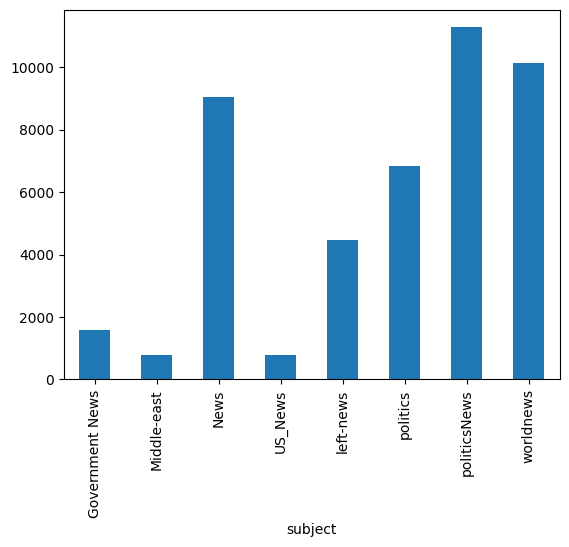

In [19]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


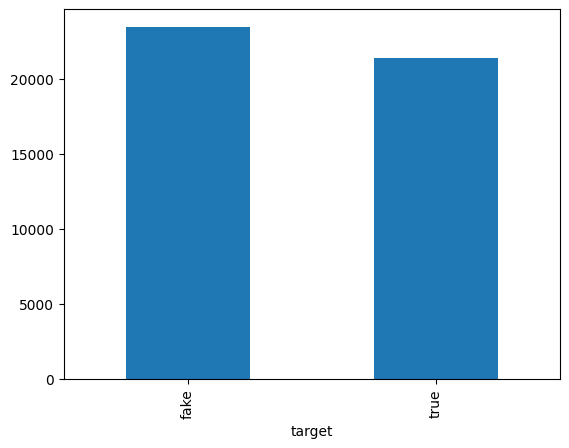

In [20]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [20]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------  297.0/301.4 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 6.2 MB/s eta 0:00:00


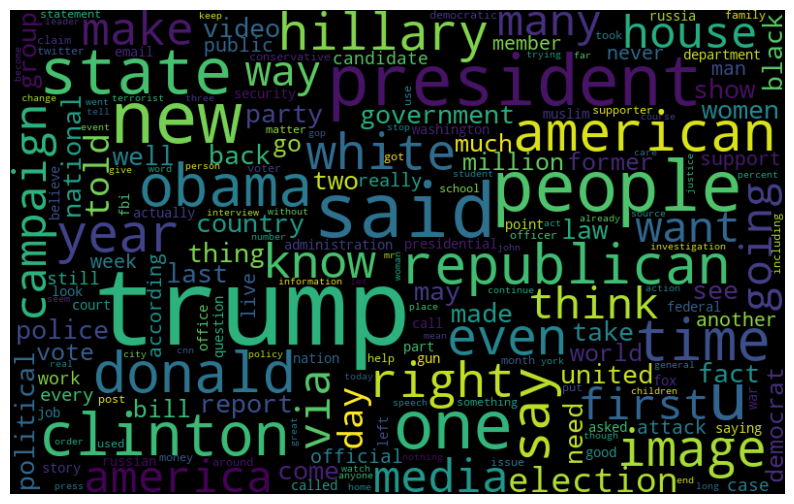

In [21]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


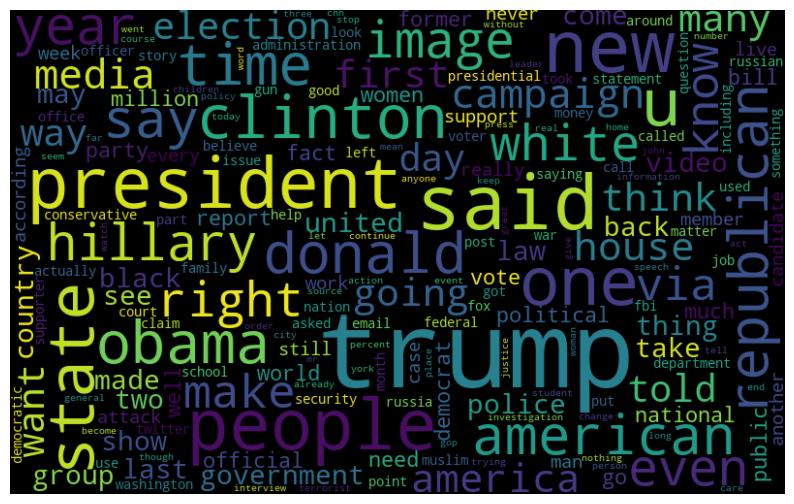

In [22]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

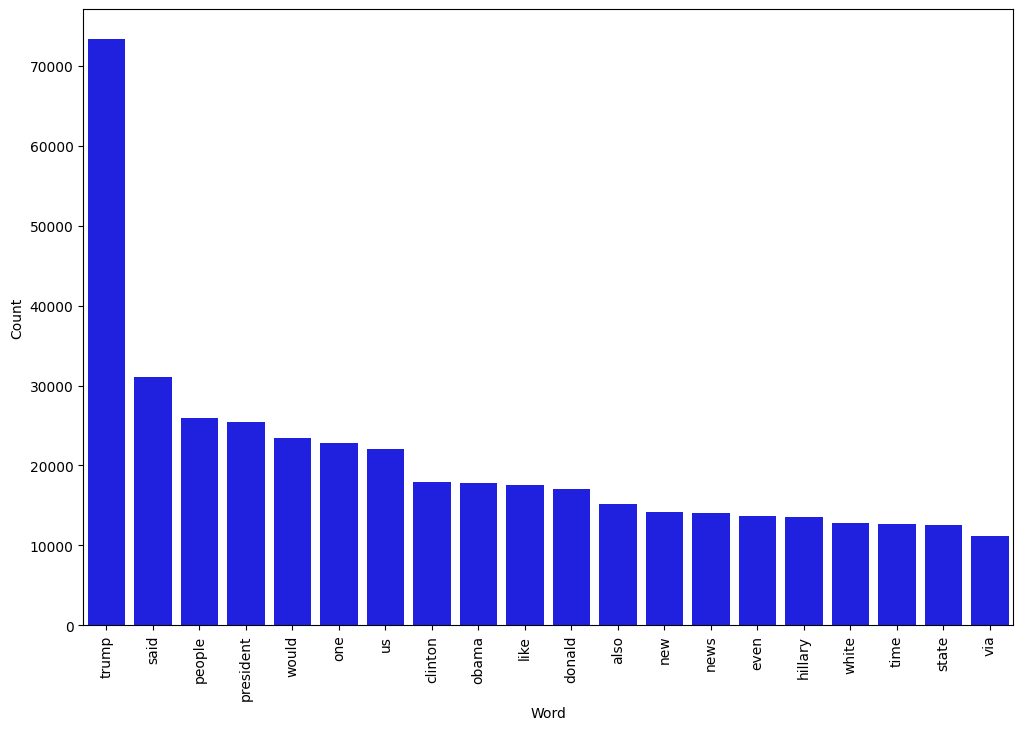

In [24]:
counter(data[data["target"] == "fake"], "text", 20)

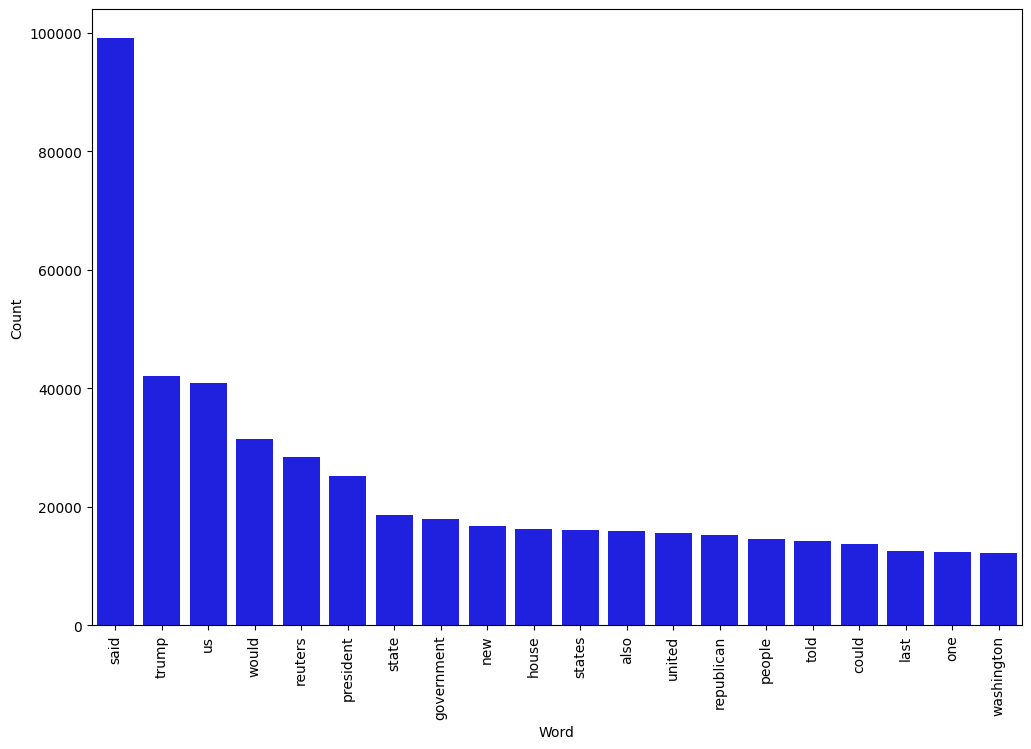

In [18]:
counter(data[data["target"] == "true"], "text", 20)

In [25]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [27]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.35%


Confusion matrix, without normalization


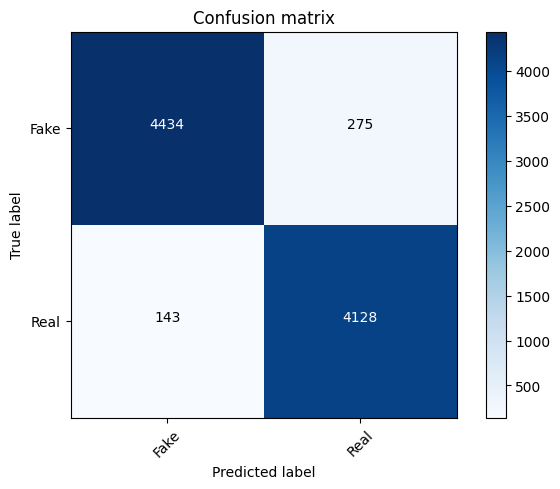

In [28]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [29]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.92%


Confusion matrix, without normalization


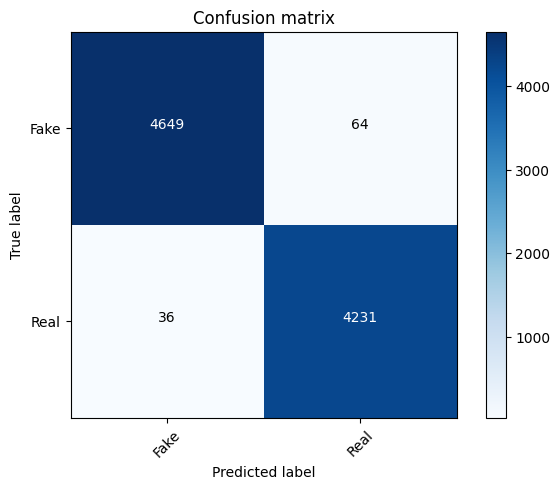

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


In [28]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.69%


Confusion matrix, without normalization


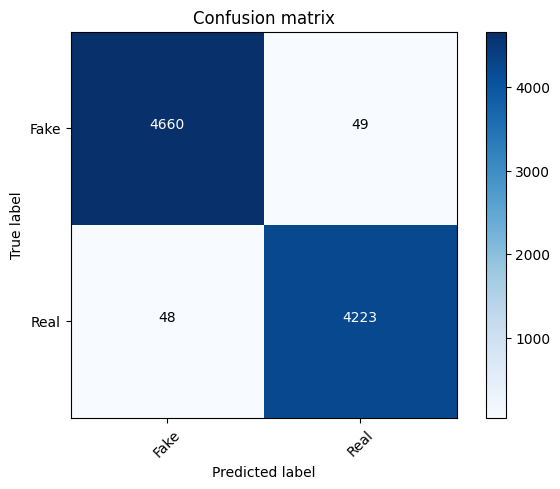

In [30]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [31]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.94%


Confusion matrix, without normalization


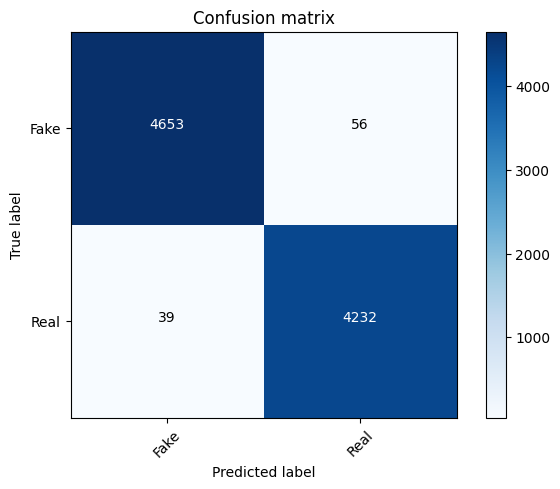

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
print(10)

In [ ]:
# Assuming you have defined dct dictionary to store accuracy scores of all algorithms

# Define a function to predict whether a news text is fake or not using all algorithms
def predict_news_type_all_algorithms(news_text):
    algorithms = dct.keys()
    predictions = {}
    for algorithm in algorithms:
        model = pipe.fit(X_train, y_train)
        prediction = model.predict([news_text])
        predictions[algorithm] = prediction[0]
    return predictions

# Example usage of the function
news_text = news_text = "On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me,  the former sheriff tweeted.  I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me. I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA pic.twitter.com/XtZW5PdU2b  David A. Clarke, Jr. (@SheriffClarke) December 30, 2017He didn t stop there.BREAKING NEWS! When LYING LIB MEDIA makes up FAKE NEWS to smear me, the ANTIDOTE is go right at them. Punch them in the nose & MAKE THEM TASTE THEIR OWN BLOOD. Nothing gets a bully like LYING LIB MEDIA S attention better than to give them a taste of their own blood #neverbackdown pic.twitter.com/T2NY2psHCR  David A. Clarke, Jr. (@SheriffClarke) December 30, 2017The internet called him out.This is your local newspaper and that search warrant isn t fake, and just because the chose not to file charges at the time doesn t mean they won t! Especially if you continue to lie. Months after decision not to charge Clarke, email search warrant filed https://t.co/zcbyc4Wp5b  KeithLeBlanc (@KeithLeBlanc63) December 30, 2017I just hope the rest of the Village People aren t implicated.  Kirk Ketchum (@kirkketchum) December 30, 2017Slaw, baked potatoes, or French fries? pic.twitter.com/fWfXsZupxy  ALT- Immigration   (@ALT_uscis) December 30, 2017pic.twitter.com/ymsOBLjfxU  Pendulum Swinger (@PendulumSwngr) December 30, 2017you called your police friends to stand up for you when someone made fun of your hat  Chris Jackson (@ChrisCJackson) December 30, 2017Is it me, with this masterful pshop of your hat, which I seem to never tire of. I think it s the steely resolve in your one visible eye pic.twitter.com/dWr5k8ZEZV  Chris Mohney (@chrismohney) December 30, 2017Are you indicating with your fingers how many people died in your jail? I think you re a few fingers short, dipshit  Ike Barinholtz (@ikebarinholtz) December 30, 2017ROFL. Internet tough guy with fake flair. pic.twitter.com/ulCFddhkdy  KellMeCrazy (@Kel_MoonFace) December 30, 2017You re so edgy, buddy.  Mrs. SMH (@MRSSMH2) December 30, 2017Is his break over at Applebees?  Aaron (@feltrrr2) December 30, 2017Are you trying to earn your  still relevant  badge?  CircusRebel (@CircusDrew) December 30, 2017make sure to hydrate, drink lots of water. It s rumored that prisoners can be denied water by prison officials.  Robert Klinc (@RobertKlinc1) December 30, 2017Terrill Thomas, the 38-year-old black man who died of thirst in Clarke s Milwaukee County Jail cell this April, was a victim of homicide. We just thought we should point that out. It can t be repeated enough.Photo by Spencer Platt/Getty Images."

predictions = predict_news_type_all_algorithms(news_text)
print(predictions)
